# Error decay in noisy Trotter (state distance)

In [1]:
from quantum_simulation_recipe.plot_config import *
from quantum_simulation_recipe.bounds import tight_bound
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d

good_color_cycle = ['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF', '#e377c2FF', '#7f7f7fFF', '#bcbd22FF', '#17becfFF']
set_color_cycle(good_color_cycle)

mpl.rcParams['legend.frameon'] = False
# mpl.rcParams['font.family'] = 'sans-serif' # 'Helvetica' 'sans-serif'  
fig_dir, data_dir = './figs', './data'

In [9]:
from evolution import Evolve_ob, Evolve_state
# from observable_decay import Evolve_ob, Evolve_state
from qiskit.quantum_info import SparsePauliOp, Statevector

from quantum_simulation_recipe.trotter import pf, expH
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
import numpy as np

H_model = 'nnh'
p_pf = 2  # Trotter formula order
n = 10
gamma = 5e-3
t, r = n, 100
# t, r = 2*n, 100
dt = t/r
t_list = np.arange(0, r)  * dt

# H_list = []
if H_model == 'nnh':
    J, h, pbc = 2, 1, True
    H_model_par = {'Jz': J, 'hx': h, 'pbc': pbc, 'group': 'xyz'}
    nnh = Nearest_Neighbour_1d(n, Jz=J, hx=h, pbc=pbc)
    # H_list = [term.to_matrix() for term in nnh.ham_par]
    H_list = [term.to_matrix() for term in nnh.ham_xyz]

U_dt_appro = pf(H_list, dt, 1, order=p_pf)
U_dt_exact = expH(sum(H_list), dt)

state_0 = Statevector.from_label('0'*n).to_operator().to_matrix()

## Fixed noise rate

In [12]:
n_pf = Evolve_state(U_dt_appro, U_dt_exact, r, state_0, gamma, p_pf, t)

c1=93.49003540311213, c2=93.49003540311206


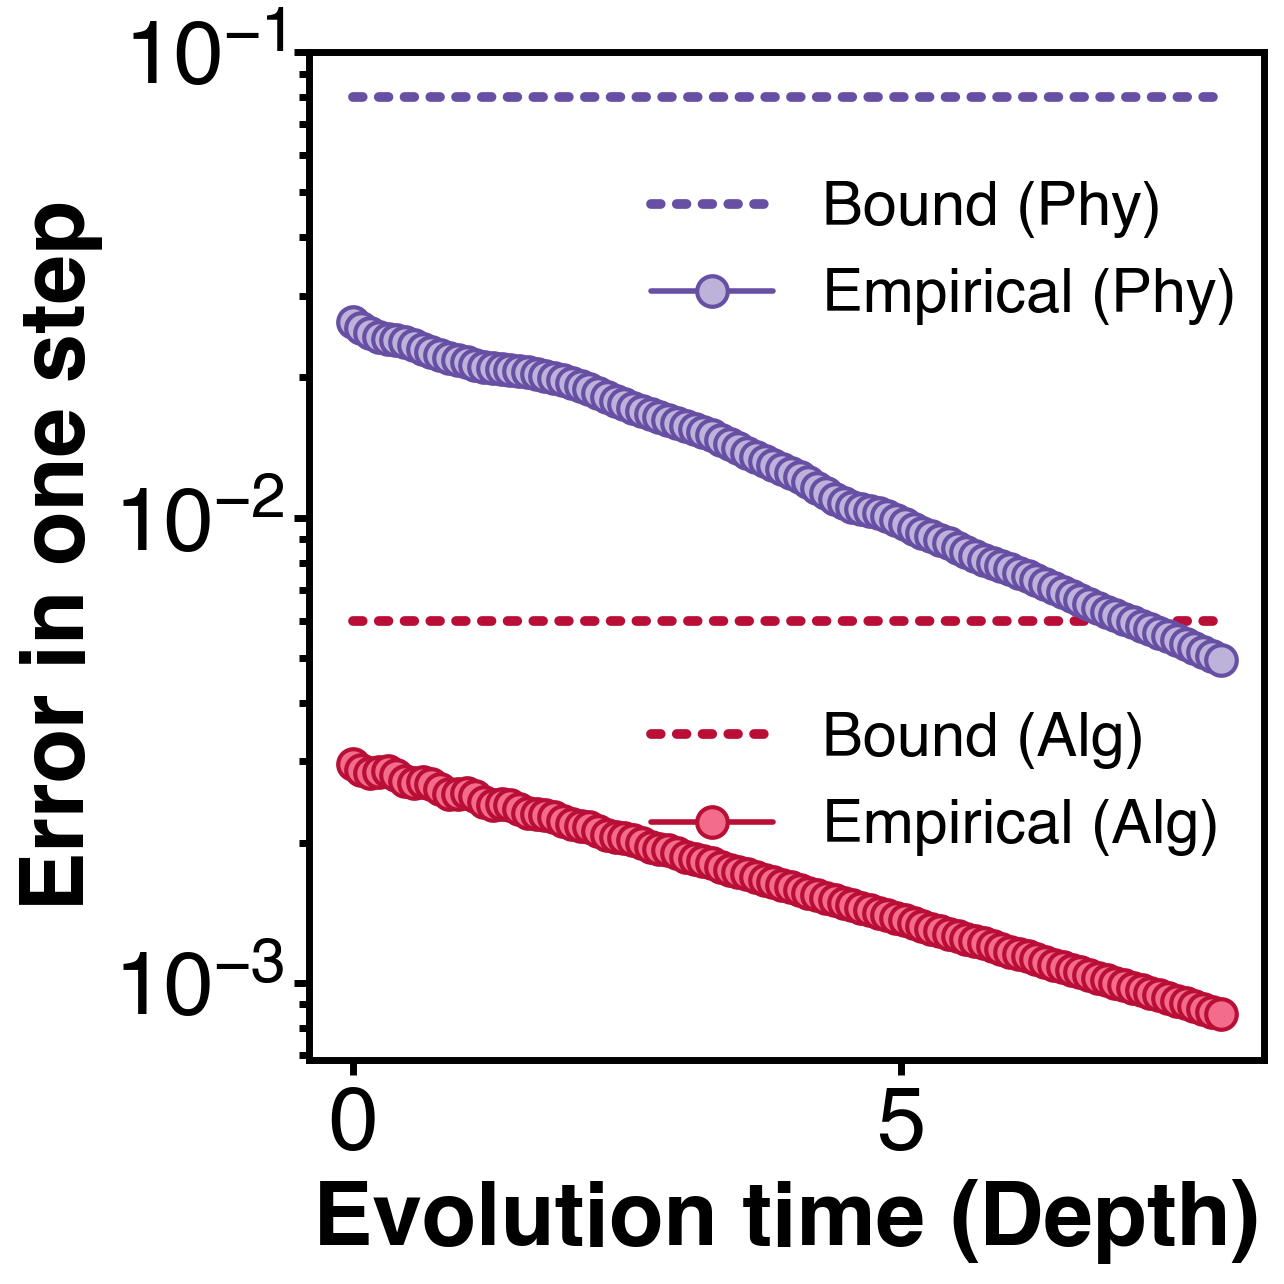

In [65]:
t_list = np.arange(0, r) * dt
set_fontsize(medium=MEDIUM_SIZE+8, large=LARGE_SIZE+8, linewidth=2.5)
plt.rc('legend', fontsize=MEDIUM_SIZE-2) 
gc = GradColors(10)
cm_phy, cm_alg, cm_tot = gc.purple, gc.red, gc.green
gd_idx = 7
phy_plot_color, alg_plot_color, tot_plot_color = cm_phy(gd_idx), cm_alg(gd_idx), cm_tot(gd_idx)
lw_wide = 3.5

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
line1, = plot_evo(ax, t_list, [2*n*gamma]*r, ':', label=f'Bound (Phy)', c=phy_plot_color, lw=lw_wide, return_line=True)
# plot naive alg bnd
naive_alg_bnd = tight_bound(H_list, p_pf, t/r, 1,  verbose=True)
line2, = plot_evo(ax, t_list, [naive_alg_bnd]*r, ':', label=f'Bound (Alg)', c=alg_plot_color, lw=lw_wide, return_line=True)
line3, = plot_evo(ax, t_list, n_pf.phy_err_list, 'o-', label=f'Empirical (Phy)', c=phy_plot_color, lw=2, return_line=True)

line4, = plot_evo(ax, t_list, n_pf.alg_err_list, 'o-', label=f'Empirical (Alg)', c=alg_plot_color, lw=2, return_line=True)

ax_set_text(ax, r'Evolution time $t$ (Depth)', 'Error in one step', log='y')
ax.set_xlabel(r'Evolution time (Depth)', fontweight='bold')
ax.set_ylabel(r'Error in one step', fontweight='bold')

first_legend = ax.legend(handles=[line1, line3], bbox_to_anchor=(0.30, 0.8), fontsize=22)
ax.add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=[line2, line4], bbox_to_anchor=(0.30, 0.4), fontsize=22)
fig.savefig(f'{fig_dir}/illustrate_exp_decay_{H_model}_n={n}_r={r}_gamma={gamma}.pdf', bbox_inches='tight')

c1=256.0, c2=128.0
Line2D(Phy bnd)


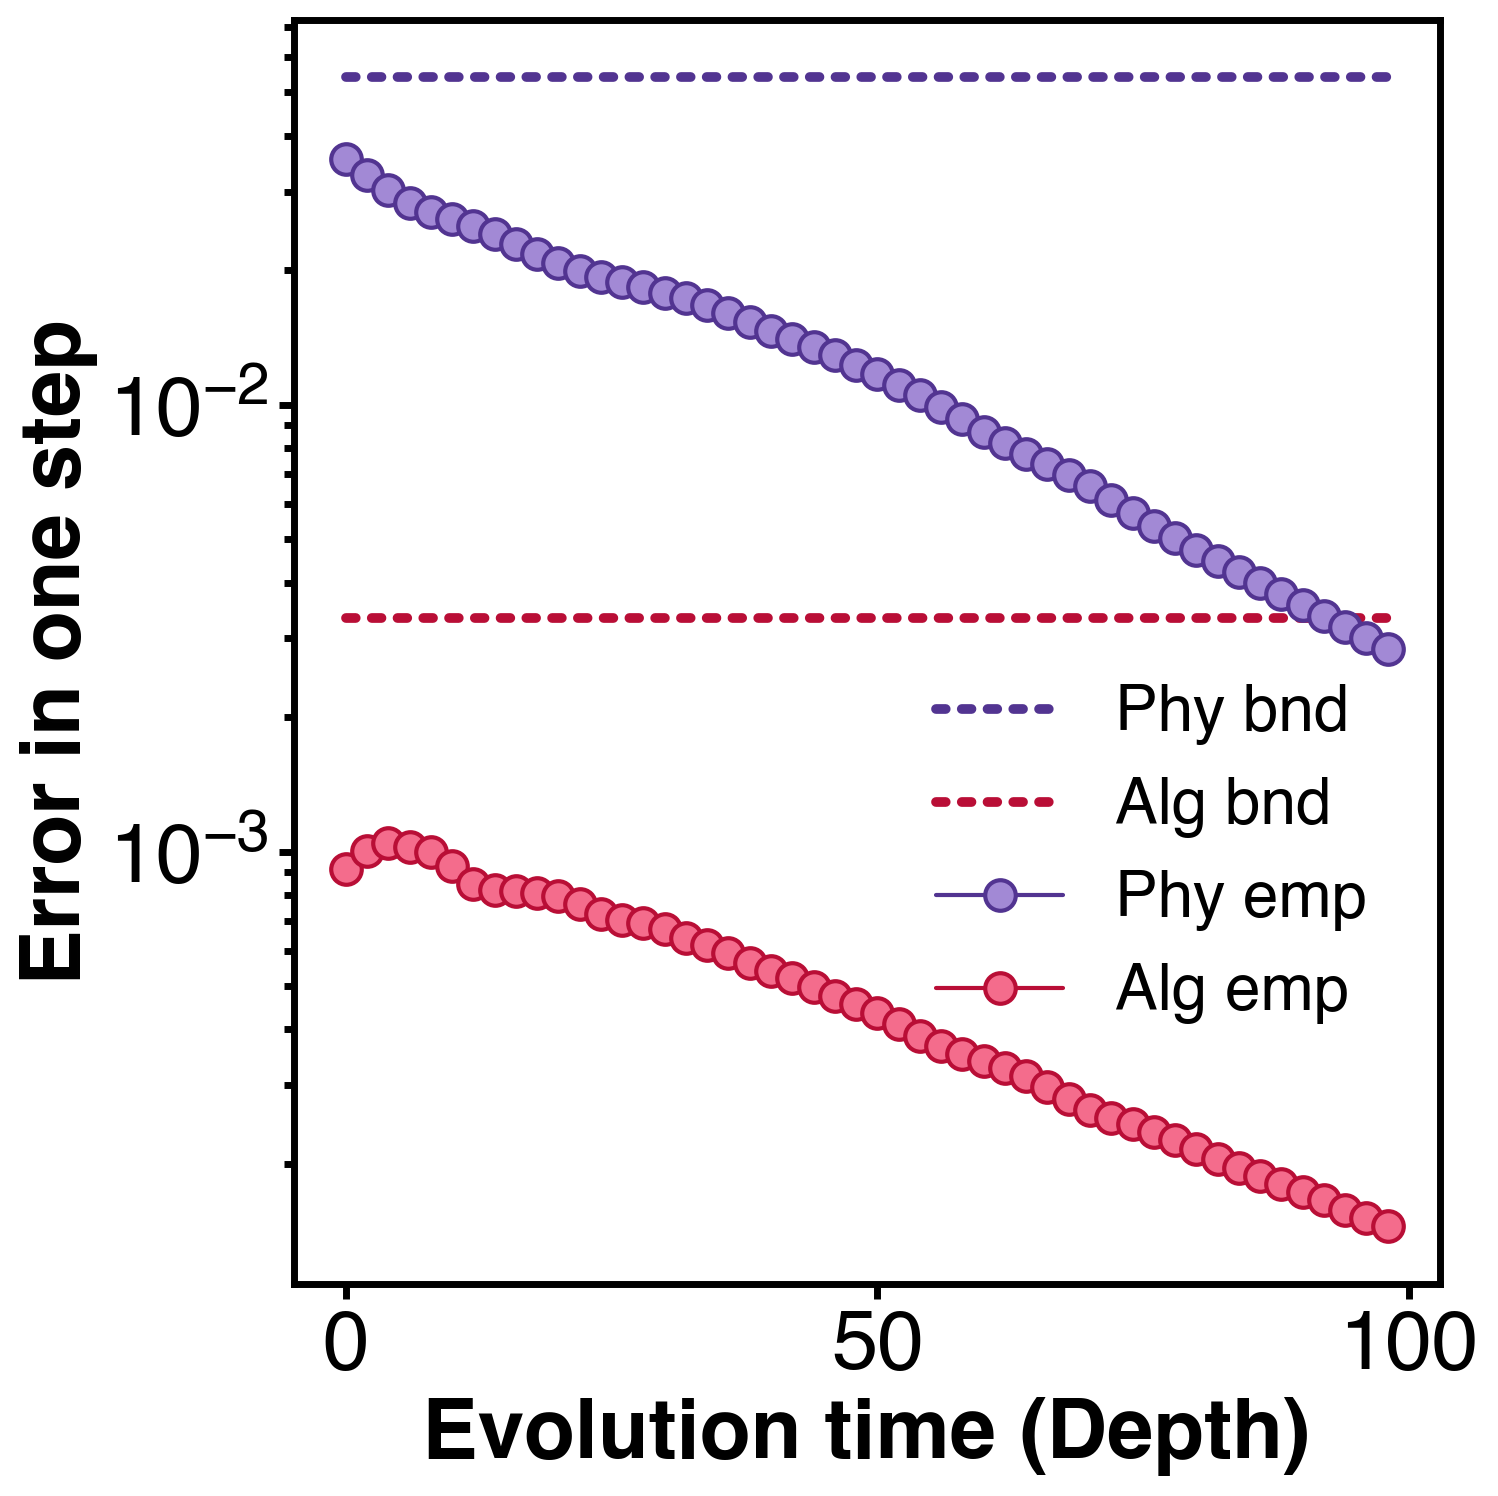

In [ ]:
## legacy
model = 'nnh'
prefix = 'data'
dirname = model

filetimes = ['Y2024M10D18_h20m19s42']
width_0 = 1.5
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

gc = GradColors(10)
cm_phy, cm_alg, cm_tot = gc.purple, gc.red, gc.green

gd_idx = 8

phy_plot_color, alg_plot_color, tot_plot_color = cm_phy(gd_idx), cm_alg(gd_idx-1), cm_tot(gd_idx)

# approx_color = '#6CA3D9DD'
# approx_color = "#75CD7AFF"
approx_color = [good_color_cycle[-2], good_color_cycle[4]]

lw_wide = 3.5

from organized.plot_data import read_dict
for idx, filetime in enumerate(filetimes):

    width_idx = width_0 + 0.5 * idx

    file_path = './' + prefix + '/' + dirname
    filename = file_path + f'/Error_00_{filetime}.txt'

    title, description, metadata, dict_data = read_dict(filename)

    plot_title = f"{description}"

    n = int(metadata['n'])
    p = float(metadata['p'])
    t = float(metadata['t'])
    r = int(metadata['r'])

    plot_num = 50
    every_k_points = r // plot_num

    if model == 'nnh':
        Jz = float(metadata['Jz'])
        hx = float(metadata['hx'])
        pbc = metadata['pbc'] == 'True'
        nnh = Nearest_Neighbour_1d(n=n, Jz=Jz, hx=hx, pbc=pbc)
        h_list = [H.to_matrix() for H in nnh.ham_xyz]

    naive_alg_bnd = tight_bound(h_list, 2, t/r, 1,  verbose=True)

    acc_tot_err_list = [float(dict_data['tot'][0])]
    for i in range(1, len(dict_data['tot'])):
        acc_tot_err_list.append(float(dict_data['tot'][i]) + acc_tot_err_list[-1])
    # plot naive bound
    plot_evo(ax, np.arange(r)[::every_k_points], [n * p]*plot_num, ':', label=f'Phy bnd', c=phy_plot_color, lw=lw_wide)
    # plot naive alg bnd
    plot_evo(ax, np.arange(r)[::every_k_points], [naive_alg_bnd]*plot_num, ':', label=f'Alg bnd', c=alg_plot_color, lw=lw_wide)

    plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['phy'][::every_k_points]), 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_idx)
    if model != 'fermi_hubbard' and model != 'hydrogen_chain':
        plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['alg'][::every_k_points]), 'o-', label=f'Alg emp', c=alg_plot_color, lw=width_idx)
    # plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['tot'][::every_k_points]), 'o-', label=f'Tot emp', c=tot_plot_color, lw=width_idx)
    # plot new bound
    # plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['2'][::every_k_points]), '.-', label=f'Entropy', c=approx_color[1], lw=lw_wide)
    # plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['1'][::every_k_points]), '.-', label=f'Tr dist', c=approx_color[0], lw=lw_wide)

    # ax.set_title(plot_title)
    ax_set_text(ax, r'Evolution time $t$ (Depth)', 'Error in one step', log='y')
    ax.set_xlabel(r'Evolution time (Depth)', fontweight='bold')
    ax.set_ylabel(r'Error in one step', fontweight='bold')
    ax.legend(loc='upper left', bbox_to_anchor=(0.51, 0.52), fontsize=23)

    # fig.savefig(f'{fig_dir}/decay_plot.pdf', bbox_inches='tight')
    plt.show()

## Vary noise rates

In [10]:
gamma_num = 6
gamma_min, gamma_max = 0.003, 0.008
gamma_list = np.linspace(gamma_min, gamma_max, num=gamma_num)

In [11]:
# initialize a dictionary to store the results
phy_errs, alg_errs = {}, {}

for i, gamma in enumerate(gamma_list):
    print(f'noise rate: {gamma:.4f}')
    # n_pf = Evolve_state(U_dt, U_dt_exact, r, state_0, True, p)
    # n_pf = Evolve_state(U_dt, U_dt_exact, r, state_0, p, dt**3)
    n_pf = Evolve_state(U_dt_appro, U_dt_exact, r, state_0, gamma, p_pf, t)
    # store the results in the dictionary
    # data[p] = n_pf
    phy_errs[gamma], alg_errs[gamma] = n_pf.phy_err_list, n_pf.alg_err_list

data = {'phy': phy_errs, 'alg': alg_errs, 'model_par': H_model_par}
np.save(f'{data_dir}/{H_model}_depo_decay_n={n}_t={t}_r={r}_gamma={gamma_min}-{gamma_max}.npy', data)

noise rate: 0.0030
noise rate: 0.0040
noise rate: 0.0050
noise rate: 0.0060
noise rate: 0.0070
noise rate: 0.0080


c1=414.21670111997327, c2=207.10835055998646


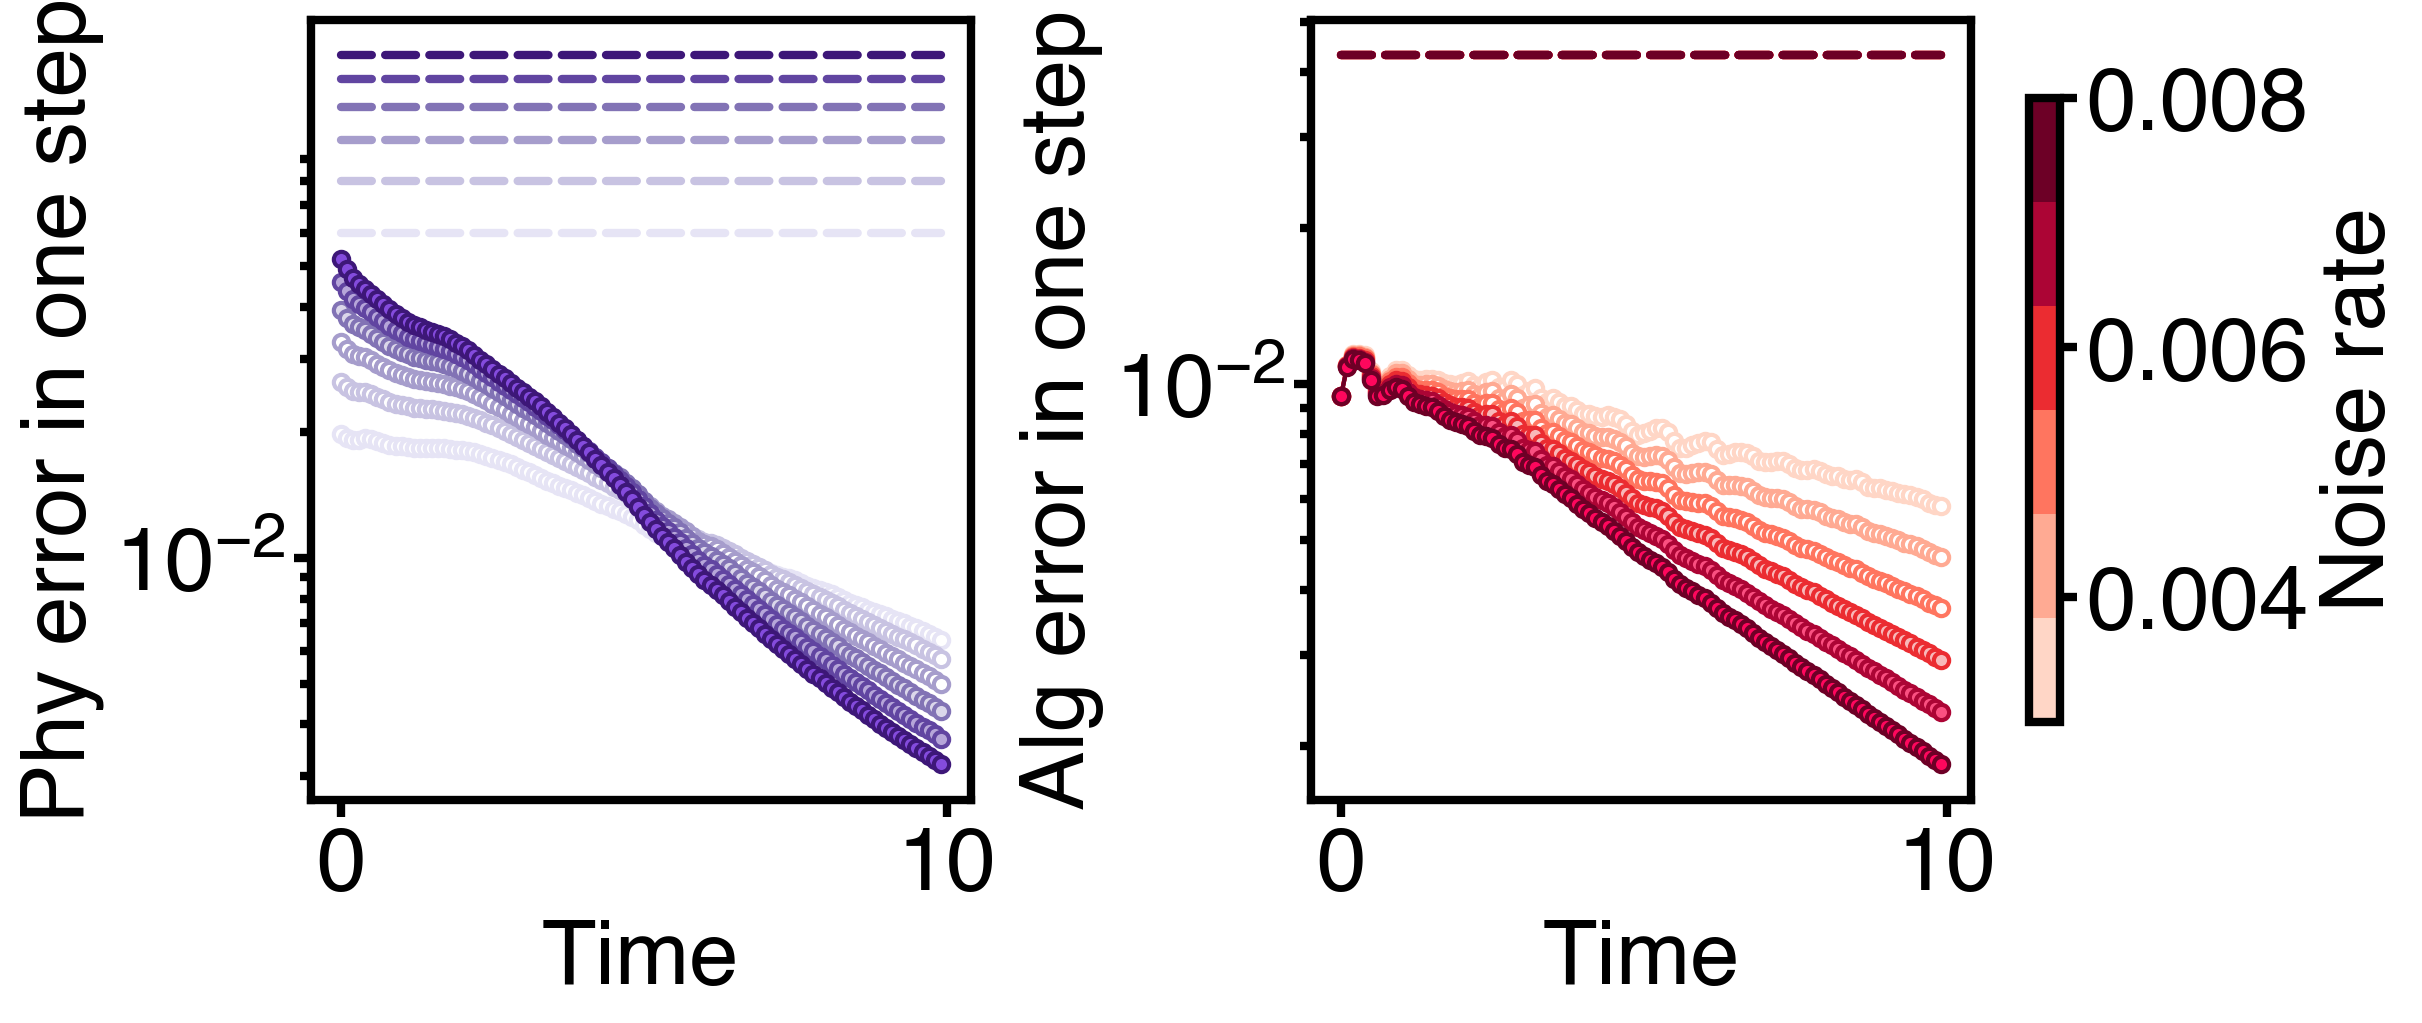

In [19]:
# read the data from the numpy file
H_model = 'nnh'

n = 10
# n = 8
gamma = 5e-3
t, r = n, 100

data = np.load(f'{data_dir}/{H_model}_depo_decay_n={n}_t={t}_r={r}_gamma={gamma_min}-{gamma_max}.npy', allow_pickle=True).item()

set_fontsize(medium=MEDIUM_SIZE+8, large=LARGE_SIZE+8, linewidth=3.0)
gc = GradColors(gamma_num)
cm_phy, cm_alg, cm_tot, cm_acc, cm_pur, cm_ent = gc.purple, gc.red, gc.green, gc.blue, gc.orange, gc.mint

fig, axes = plt.subplot_mosaic(
    """
    AB
    """, constrained_layout=True, sharex=True, figsize=(12, 5))

worst_alg_bnd = tight_bound(H_list, 2, t/r, 1,  verbose=True)

for i, gamma in enumerate(gamma_list):
    plot_evo(axes['A'], t_list, data['phy'][gamma], '.-', label='Phy error', c=cm_phy(i), ylabel='Phy error in one step', xlabel='Time')  # data[p].phy_err_list
    plot_evo(axes['B'], t_list, data['alg'][gamma], '.-', label='Alg error', c=cm_alg(i), ylabel='Alg error in one step', xlabel='Time')

    worst_phy_bnd = 2 * n * gamma
    plot_evo(axes['A'], t_list, [worst_phy_bnd]*len(t_list), '--', label='Phy error (worst bound)', c=cm_phy(i), ylabel='Phy error in one step', xlabel='Time', lw=3)  # data[p].phy_err_list
    plot_evo(axes['B'], t_list, [worst_alg_bnd]*len(t_list), '--', label='Alg error (worst bound)', c=cm_alg(i), ylabel='Alg error in one step', xlabel='Time', lw=3)  # data[p].phy_err_list

axes['A'].set_yscale('log'); axes['B'].set_yscale('log'); 
axes['A'].set_yticks([1e-2]); axes['B'].set_yticks([1e-2])
for ax in [axes['A'], axes['B']]:
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
cm_normalizer = plt.Normalize(vmin=gamma_list[0], vmax=gamma_list[-1])
plt.colorbar(plt.cm.ScalarMappable(cmap=cm_alg, norm=cm_normalizer), ax=axes['B'], label='Noise rate', shrink=0.8)
# letter_annotation(axes, -.2, 1.0, ['A', 'B', 'C', 'D'], fontsize=26)
prefix, suffix = H_model, 'ErrVSt_fixdt'
fig.savefig(f'{fig_dir}/{prefix}_{suffix}_n={n}_dt={dt}_t={t}_r={r}.pdf')

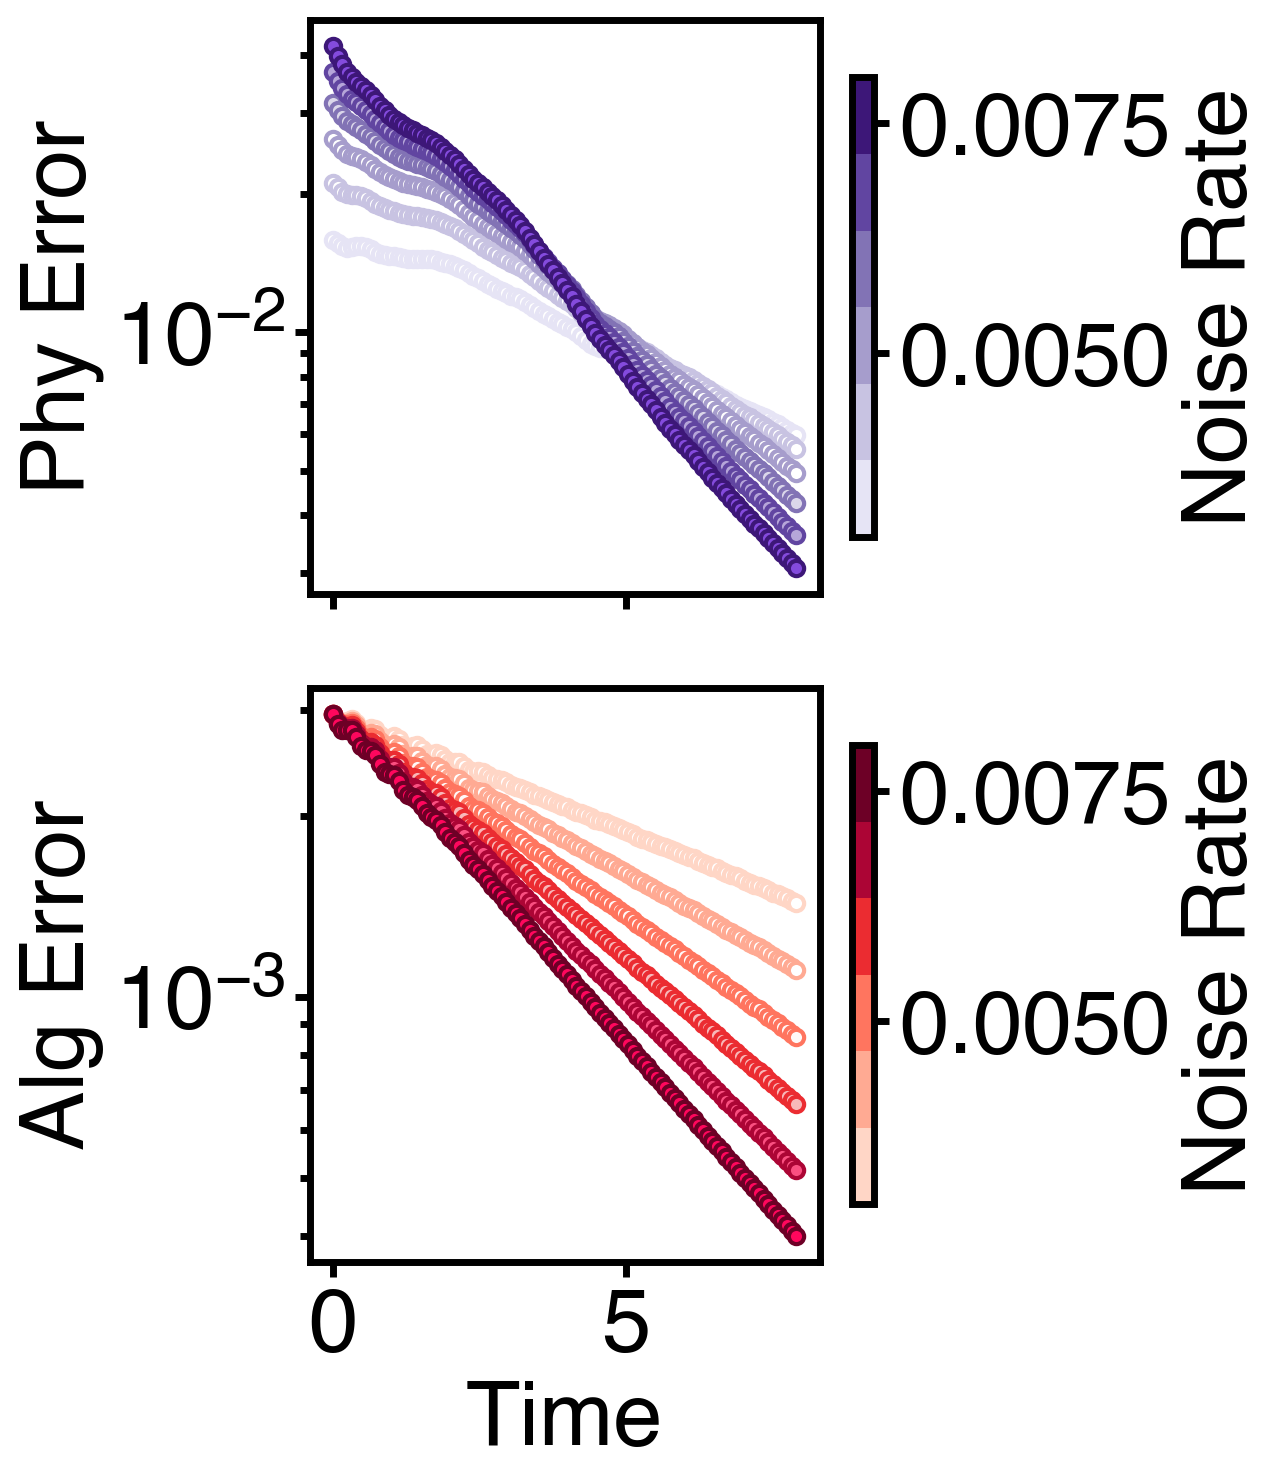

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(7, 8), sharex=True)
axes = {'A': axes[0], 'B': axes[1]}

for i, gamma in enumerate(gamma_list):
    # plot_evo(axes['A'], t_list, data['phy'][gamma], '.-', c=cm_phy(i), ylabel='One-step Phy Error')
    plot_evo(axes['A'], t_list, data['phy'][gamma], '.-', c=cm_phy(i), ylabel='Phy Error')
    plot_evo(axes['B'], t_list, data['alg'][gamma], '.-', c=cm_alg(i), ylabel='Alg Error', xlabel='Time')

axes['A'].set_yscale('log'); axes['B'].set_yscale('log'); 
axes['A'].set_yticks([1e-2]); axes['B'].set_yticks([1e-3])
# yticks_values = [1e-3, 1e-2]  # Adjust these values as needed
for ax in [axes['A'], axes['B']]:
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
    # ax.yaxis.set_minor_locator(plt.NullLocator())
#     ax.set_yticks(yticks_values)
#     # ax.set_yticklabels(['0.001', '0.01'])

cm_norm = plt.Normalize(vmin=gamma_list[0], vmax=gamma_list[-1])
# plt.colorbar(plt.cm.ScalarMappable(cmap=cm_phy, norm=cm_norm), ax=axes['A'], label='Noise Rate', location='top', pad=0.05, shrink=0.9)
plt.colorbar(plt.cm.ScalarMappable(cmap=cm_phy, norm=cm_norm), ax=axes['A'], label='Noise Rate', shrink=0.8)
plt.colorbar(plt.cm.ScalarMappable(cmap=cm_alg, norm=cm_norm), ax=axes['B'], label='Noise Rate', shrink=0.8)
# letter_annotation(axes, -.2, 1.0, ['A', 'B', 'C', 'D'], fontsize=26)
prefix, suffix = H_model, 'ErrVSt_fixdt'
fig.savefig(f'{fig_dir}/{prefix}_{suffix}_n={n}_dt={dt}_t={t}_r={r}_row.pdf', bbox_inches='tight')

## Other noise channels

- global depolarizing
- local depolarizing
- local dephasing

In [66]:
from evolution import Evolve_ob, Evolve_state
from qiskit.quantum_info import SparsePauliOp, Statevector

from quantum_simulation_recipe.trotter import pf, expH
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
import numpy as np

model = 'nnh'
n = 10
p_pf = 2
t, r = n, 100
# t, r = 2*n, 100
dt = t/r
t_list = np.arange(0, r) * dt

# p_num = 2
gamma_num = 6
gamma_min, gamma_max = 0.003, 0.008
gamma_list = np.linspace(gamma_min, gamma_max, num=gamma_num)

H_list = []

J, h, pbc = 2, 1, True
model_par = {'Jz': J, 'hx': h, 'pbc': pbc}
nnh = Nearest_Neighbour_1d(n, Jz=J, hx=h, pbc=pbc)
# H_list = [term.to_matrix() for term in nnh.ham_par]
H_list = [term.to_matrix() for term in nnh.ham_xyz]

U_dt = pf(H_list, dt, 1, order=p_pf)
U_dt_exact = expH(sum(H_list), dt)

state_0 = Statevector.from_label('0'*n).to_operator().to_matrix()

# initialize a dictionary to store the results
phy_errs_depo, alg_errs_depo = {}, {}
# phy_errs_glob, alg_errs_glob = {}, {}
phy_errs_deph, alg_errs_deph = {}, {}
phy_errs_damp, alg_errs_damp = {}, {}

for i, gamma in enumerate(gamma_list):
    print(f'noise rate: {gamma:.4f}')
    n_pf_local_depo = Evolve_state(U_dt, U_dt_exact, r, state_0, gamma, p_pf, t, noise_type='local_depolar')
    n_pf_local_deph = Evolve_state(U_dt, U_dt_exact, r, state_0, gamma, p_pf, t, noise_type='local_dephase')
    n_pf_local_damp = Evolve_state(U_dt, U_dt_exact, r, state_0, gamma, p_pf, t, noise_type='local_ampdamp')
    # n_pf_local_depo = Evolve_state(U_dt, U_dt_exact, r, state_0, True, p, noise_type='local_depolar')
    # store the results in the dictionary
    # data[p] = n_pf
    phy_errs_depo[gamma], alg_errs_depo[gamma] = n_pf_local_depo.phy_err_list, n_pf_local_depo.alg_err_list
    phy_errs_deph[gamma], alg_errs_deph[gamma] = n_pf_local_deph.phy_err_list, n_pf_local_deph.alg_err_list
    phy_errs_damp[gamma], alg_errs_damp[gamma] = n_pf_local_damp.phy_err_list, n_pf_local_damp.alg_err_list
    print('depo: ', phy_errs_depo[gamma])
    print('deph: ', phy_errs_deph[gamma])
    print('damp: ', phy_errs_damp[gamma])

data = {'phy_deph': phy_errs_deph, 'alg_deph': alg_errs_deph, 'phy_depo': phy_errs_depo, 'alg_depo': alg_errs_depo, 'phy_damp': phy_errs_damp, 'alg_damp': alg_errs_damp, 'model_par': model_par}
np.save(f'{data_dir}/{model}_depo_deph_damp_decay_n={n}_t={t}_r={r}_gamma{gamma_min}_{gamma_max}.npy', data)
# On my M3 Macbook pro, for n=10, it takes 10mins for one noise channel and one noise rate. (n=8, 30secs)

noise rate: 0.0030
depo:  [0.019822280278772038, 0.019425098554785757, 0.019196102839190224, 0.019222048994299995, 0.019332963617141055, 0.019280714189761836, 0.019080552871594388, 0.018847858635133188, 0.018660489845191787, 0.018556799672568083, 0.018504154711123783, 0.018430514073936477, 0.01836300802101002, 0.018337040698348732, 0.018343127396420862, 0.01835900297284051, 0.01835130322439667, 0.01830577955892459, 0.01824190748262193, 0.018178299061213602, 0.01811174892724567, 0.018023716816573603, 0.01789980638455808, 0.01774327376838491, 0.017567902243250375, 0.017384053952270436, 0.01719671692928233, 0.016997459801637308, 0.016766691077009215, 0.016511266155346992, 0.016266155398398506, 0.016042730850298385, 0.0158178195785689, 0.015573630306380462, 0.015329125026981938, 0.015112375800045739, 0.01491611562999139, 0.014717367329445378, 0.014520799505931924, 0.014327793601127315, 0.014129828072301908, 0.013927082062275054, 0.01371953934306057, 0.013508318345437396, 0.0133079046355136

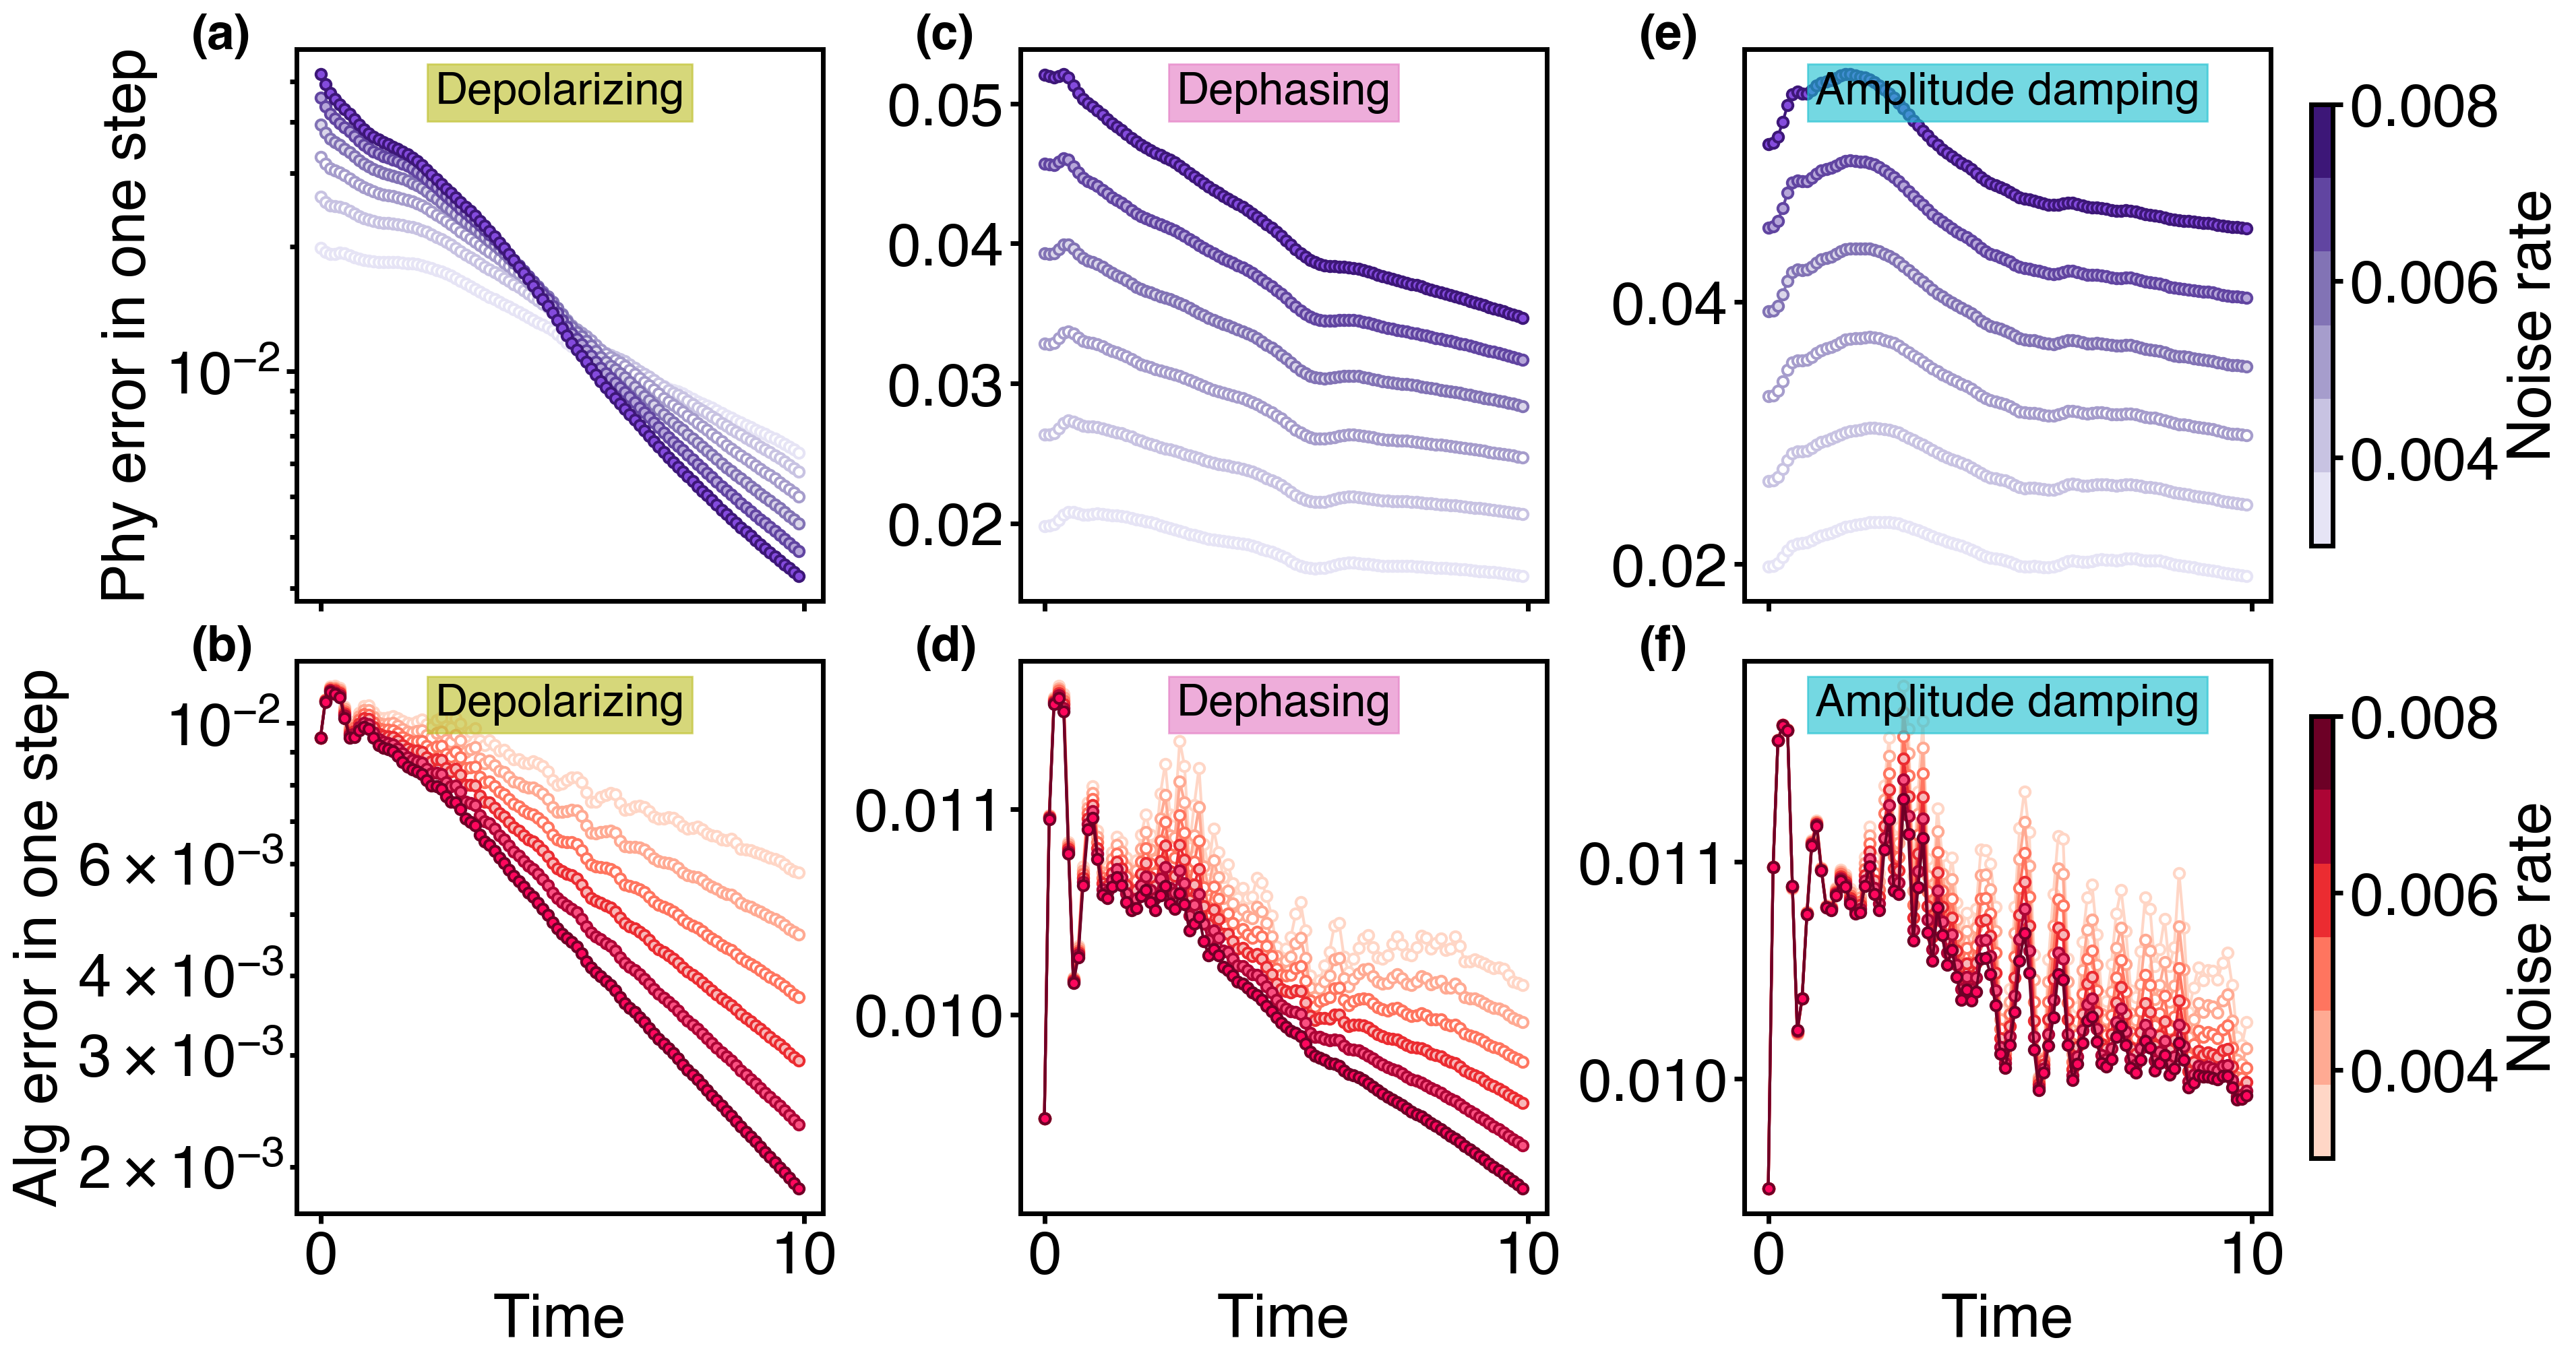

In [18]:
import numpy as np
model = 'nnh'
n = 10
p_pf = 2
t, r = n, 100
# t, r = 2*n, 100
dt = t/r
t_list = np.arange(0, r) * dt

# p_num = 2
gamma_num = 6
gamma_min, gamma_max = 0.003, 0.008
gamma_list = np.linspace(gamma_min, gamma_max, num=gamma_num)

# read the data from the numpy file
data = np.load(f'{data_dir}/{model}_depo_deph_damp_decay_n={n}_t={t}_r={r}_gamma{gamma_min}_{gamma_max}.npy', allow_pickle=True).item()

set_fontsize(medium=MEDIUM_SIZE+8, large=LARGE_SIZE+8, linewidth=2.5)
gc = GradColors(gamma_num)
cm_phy, cm_alg, cm_tot, cm_acc, cm_pur, cm_ent = gc.purple, gc.red, gc.green, gc.blue, gc.orange, gc.mint

fig, axes = plt.subplot_mosaic(
    """
    ACE
    BDF
    """, constrained_layout=True, sharex=True, figsize=(19, 10))
    # """, constrained_layout=True, sharex=True, figsize=(16, 14))

for i, gamma in enumerate(gamma_list):
    plot_evo(axes['A'], t_list, data['phy_depo'][gamma], '.-', label='Phy error', c=cm_phy(i), ylabel='Phy error in one step')  # data[p].phy_err_list
    plot_evo(axes['B'], t_list, data['alg_depo'][gamma], '.-', label='Alg error', c=cm_alg(i), ylabel='Alg error in one step', xlabel='Time')
    plot_evo(axes['C'], t_list, data['phy_deph'][gamma], '.-', label='Phy error', c=cm_phy(i))  # data[p].phy_err_list
    plot_evo(axes['D'], t_list, data['alg_deph'][gamma], '.-', label='Alg error', c=cm_alg(i), xlabel='Time')
    plot_evo(axes['E'], t_list, data['phy_damp'][gamma], '.-', label='Phy error', c=cm_phy(i))  # data[p].phy_err_list
    plot_evo(axes['F'], t_list, data['alg_damp'][gamma], '.-', label='Alg error', c=cm_alg(i), xlabel='Time')
# bbox_props = dict(facecolor='w', alpha=1, edgecolor='w')
bbox_props_depo = dict(facecolor='#bcbd22FF', alpha=.6, edgecolor='#bcbd22FF')
bbox_props_deph = dict(facecolor='#e377c2FF', alpha=.6, edgecolor='#e377c2FF')
bbox_props_damp = dict(facecolor='#17becfFF', alpha=.6, edgecolor='#17becfFF')
axes['A'].annotate('Depolarizing', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=24, ha='center', bbox=bbox_props_depo)
axes['B'].annotate('Depolarizing', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=24, ha='center', bbox=bbox_props_depo)
axes['C'].annotate('Dephasing', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=24, ha='center', bbox=bbox_props_deph)
axes['D'].annotate('Dephasing', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=24, ha='center', bbox=bbox_props_deph)
axes['E'].annotate('Amplitude damping', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=24, ha='center', bbox=bbox_props_damp)
axes['F'].annotate('Amplitude damping', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=24, ha='center', bbox=bbox_props_damp)

axes['A'].set_yscale('log'); axes['B'].set_yscale('log'); 
cm_normalizer = plt.Normalize(vmin=gamma_list[0], vmax=gamma_list[-1])
# plt.colorbar(plt.cm.ScalarMappable(cmap=cm_alg, norm=cm_normalizer), ax=axes['B'], label='Noise rate', shrink=0.8)
# plt.colorbar(plt.cm.ScalarMappable(cmap=cm_alg, norm=cm_normalizer), ax=axes['D'], label='Noise rate', shrink=0.8)
plt.colorbar(plt.cm.ScalarMappable(cmap=cm_phy, norm=cm_normalizer), ax=axes['E'], label='Noise rate', shrink=0.8)
plt.colorbar(plt.cm.ScalarMappable(cmap=cm_alg, norm=cm_normalizer), ax=axes['F'], label='Noise rate', shrink=0.8)
letter_annotation(axes, -.2, 1.0, ['A', 'B', 'C', 'D', 'E', 'F'], fontsize=26)
prefix, suffix = 'TFI', 'ErrVSt_fixdt'
fig.savefig(f'{fig_dir}/{prefix}_{suffix}_depo_deph_damp_decay_n={n}_dt={dt}_t={t}_r={r}_row.pdf', bbox_inches='tight')

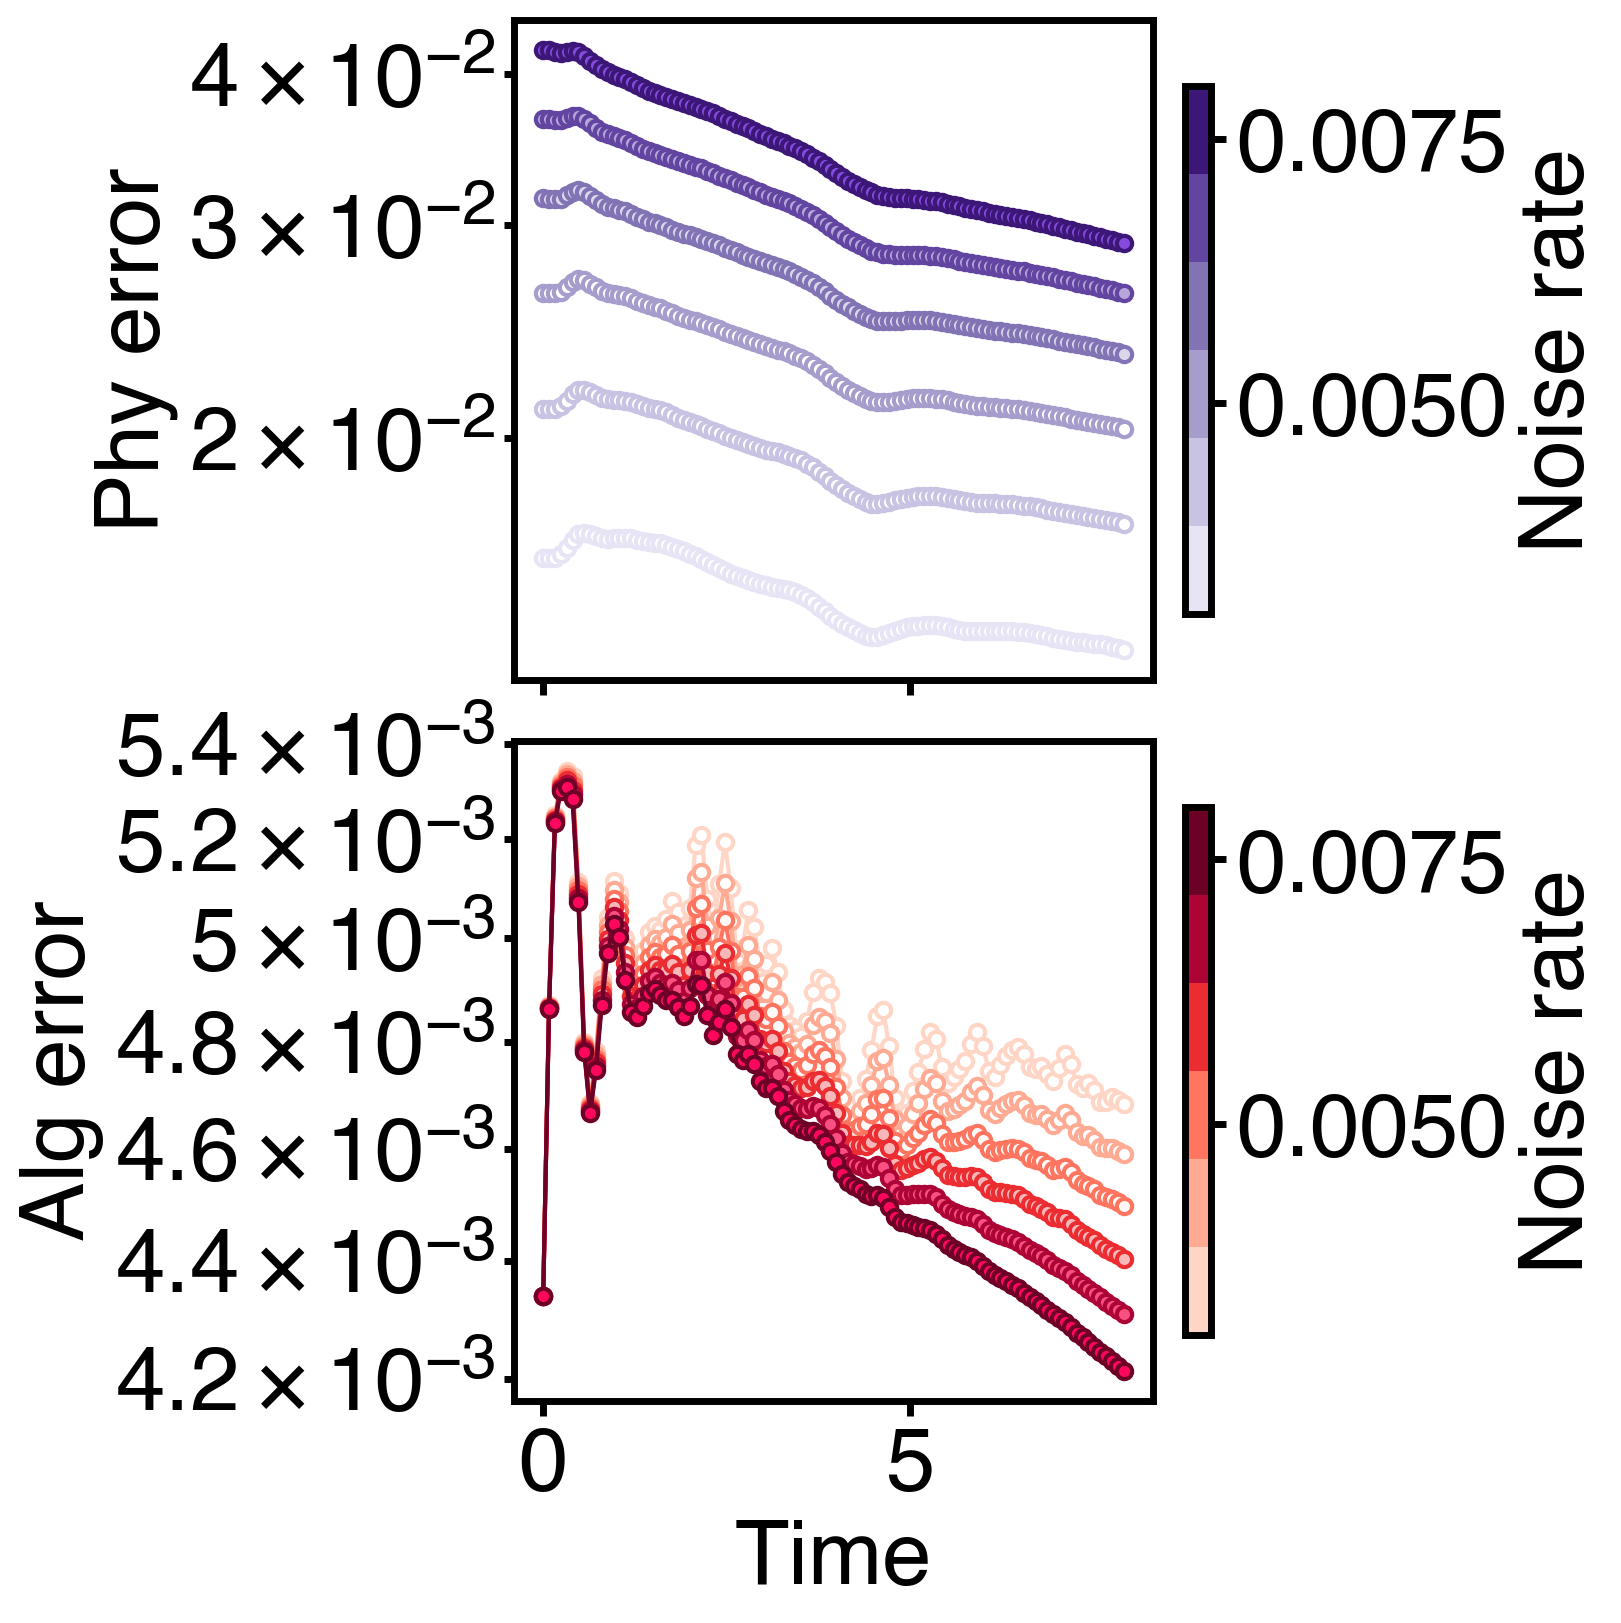

In [13]:
# read the data from the numpy file
data = np.load(f'./data/npy/{model}_depo_deph_damp_decay_n={n}_t={t}_r={r}_gamma{gamma_min}_{gamma_max}.npy', allow_pickle=True).item()

set_fontsize(medium=MEDIUM_SIZE+8, large=LARGE_SIZE+8, linewidth=2.5)
gc = GradColors(gamma_num)
cm_phy, cm_alg, cm_tot, cm_acc, cm_pur, cm_ent = gc.purple, gc.red, gc.green, gc.blue, gc.orange, gc.mint

fig, axes = plt.subplot_mosaic(
    """
    A
    B
    """, constrained_layout=True, sharex=True, figsize=(8, 8))

for i, gamma in enumerate(gamma_list):
    plot_evo(axes['A'], t_list, data['phy_deph'][gamma], '.-', label='Phy error', c=cm_phy(i), ylabel='Phy error')  # data[gamma].phy_err_list
    plot_evo(axes['B'], t_list, data['alg_deph'][gamma], '.-', label='Alg error', c=cm_alg(i), ylabel='Alg error')

axes['A'].set_yscale('log'); axes['B'].set_yscale('log'); 
axes['B'].set_xlabel(fr'Time')

# from matplotlib.ticker import ScalarFormatter
# # axes['A'].ticklabel_format(style='plain', axis='y')
# formatter = ScalarFormatter()
# formatter.set_scientific(False)  # Disable scientific notation
# axes['A'].yaxis.set_major_formatter(formatter)
# axes['B'].yaxis.set_major_formatter(formatter)

# from matplotlib.ticker import FuncFormatter, LogLocator
# # Define a custom formatter function to display ticks as decimals
# def decimal_formatter(x, pos):
#     return f'{x:.3f}'  # Format to 2 decimal places
# # Apply the formatter to the y-axis
# axes['A'].yaxis.set_major_formatter(FuncFormatter(decimal_formatter))
# axes['B'].yaxis.set_major_formatter(FuncFormatter(decimal_formatter))
# # Override the default tick locator to generate ticks at specific positions
# axes['A'].yaxis.set_major_locator(LogLocator(subs='all'))  # Add ticks at all powers of 10
# axes['B'].yaxis.set_major_locator(LogLocator(subs='auto'))  # Add ticks at all powers of 10
# Set y-ticks as decimal numbers
# axes['B'].set_yticks([0.015, 0.014, 0.013, 0.012])

# axes['B'].yaxis.set_major_locator(plt.MaxNLocator(3))
cm_normalizer = plt.Normalize(vmin=gamma_list[0], vmax=gamma_list[-1])
plt.colorbar(plt.cm.ScalarMappable(cmap=cm_phy, norm=cm_normalizer), ax=axes['A'], label='Noise rate', shrink=0.8)
plt.colorbar(plt.cm.ScalarMappable(cmap=cm_alg, norm=cm_normalizer), ax=axes['B'], label='Noise rate', shrink=0.8)

# letter_annotation(axes, -.2, 1.0, ['A', 'B', 'C', 'D', 'E', 'F'], fontsize=26)
prefix, suffix = 'TFI', 'ErrVSt_fixdt'
fig.savefig(f'{fig_dir}/{prefix}_{suffix}_deph_decay_n={n}_dt={dt}_t={t}_r={r}.pdf', bbox_inches='tight')